In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings

warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv("movies.csv")
credits = pd.read_csv("credits.csv")

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


### Merging both files

In [5]:
movie_credit = pd.merge(movies,credits,left_on = "id", right_on = "movie_id")
movie_credit.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
movie_credit.shape

(4803, 24)

In [7]:
movie_credit.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [8]:
type(movie_credit["release_date"])

pandas.core.series.Series

### Changing Date type

In [9]:
movie_credit["release_date"] = pd.to_datetime(movie_credit["release_date"])

In [10]:
movie_credit["release_date"].head(3)

0   2009-12-10
1   2007-05-19
2   2015-10-26
Name: release_date, dtype: datetime64[ns]

In [11]:
release_year = movie_credit["release_date"].dt.year
release_year.head(5)

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4    2012.0
Name: release_date, dtype: float64

In [12]:
release_year = movie_credit["release_date"].dt.year.value_counts(dropna="False")
release_year.head(5)

2009.0    247
2014.0    238
2006.0    237
2013.0    231
2008.0    227
Name: release_date, dtype: int64

### Filtering Year where more than 100 movies released

In [13]:
release_year = release_year[release_year >= 100].sort_index()
release_year.index = release_year.index.astype(int)
release_year

1997    112
1998    133
1999    171
2000    166
2001    183
2002    203
2003    169
2004    204
2005    217
2006    237
2007    195
2008    227
2009    247
2010    225
2011    223
2012    208
2013    231
2014    238
2015    216
2016    104
Name: release_date, dtype: int64

In [14]:
year = release_year.index.to_list()
year

[1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [15]:
movies_count = release_year.values.tolist()
movies_count

[112,
 133,
 171,
 166,
 183,
 203,
 169,
 204,
 217,
 237,
 195,
 227,
 247,
 225,
 223,
 208,
 231,
 238,
 216,
 104]

### year of Max movies released

In [16]:
max_count_year = year[movies_count.index(max(movies_count))]
max_count_year

2009

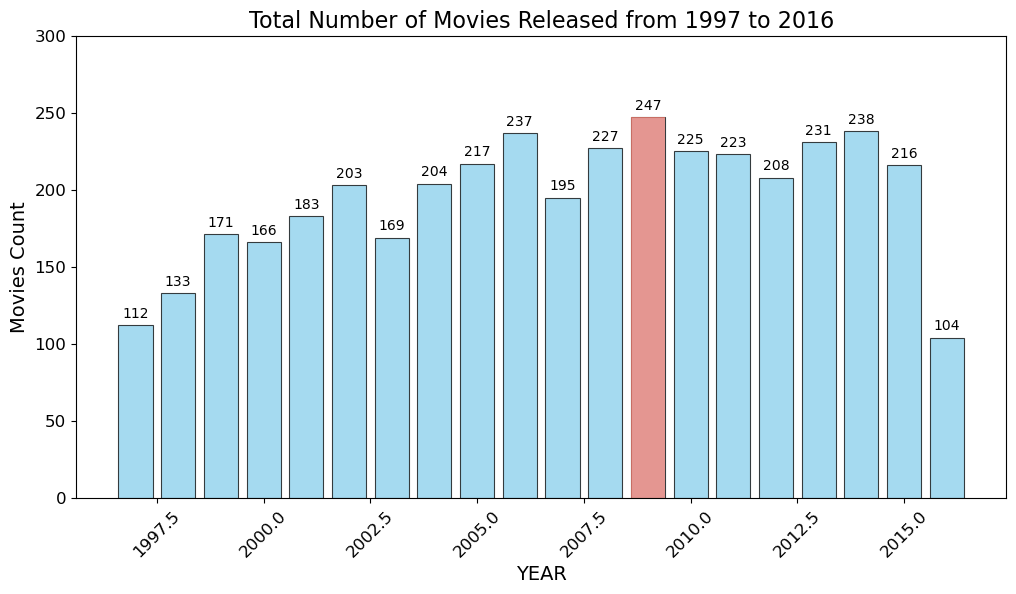

In [17]:
plt.figure(figsize = (12,6))
plt.bar(year,movies_count,color = "skyblue",alpha = 0.75,edgecolor = "black",linewidth = 0.8)
plt.xlabel('YEAR', fontsize = 14)
plt.ylabel("Movies Count", fontsize = 14)
plt.title("Total Number of Movies Released from 1997 to 2016", fontsize = 16)
plt.xticks(rotation =45, fontsize = 12)
plt.yticks(fontsize = 12)

#Highlight the bar for the year with the highest movie releases
highlight = year.index(max_count_year)
plt.bar(year[highlight],movies_count[highlight],color = "salmon",alpha = 0.75)


#setting y-ticks range

plt.yticks(range(0,301,50),fontsize = 12)

#data labelling
for year, count in zip(year,movies_count):
    plt.text(year, count + 5 , str(count), ha= "center")
    
# Adding a background color
ax=plt.gca()
ax.set_facecolor=('f7f7f7')

plt.show()

In [18]:
movie_credit["popularity"]

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64

In [19]:
movie_credit["popularity"].agg(func=['mean','max','min'])

mean     21.492301
max     875.581305
min       0.000000
Name: popularity, dtype: float64

## Budget vs. Revenue Scatter Plot:
   ### Create a scatter plot to visualize the relationship between budget and revenue for the movies. This can help identify if there's a correlation between the two.

In [20]:
budget = movie_credit["budget"]
revenue = movie_credit["revenue"]

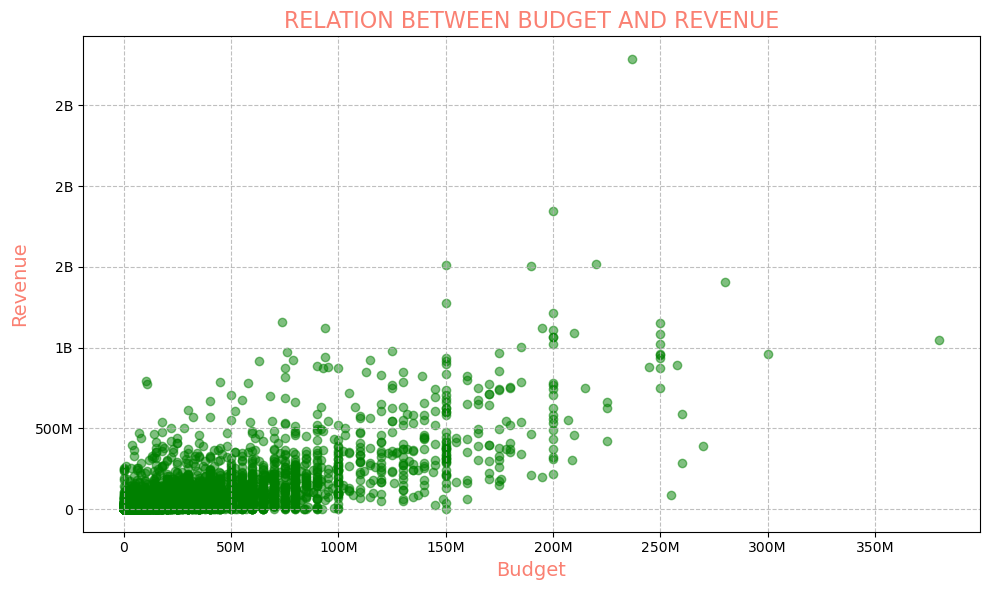

In [21]:
# Formating lare values into alphanumeric

def format_values(value,pos):
    if value >=1e9:
        return f'{value/1e9:.0f}B'
    elif  1e9 > value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif 1e6 > value >= 1e3:
        return f'{value/1e3:.0f}k'
    else:
        return f'{value:.0f}'
    
    
# Scater plot
plt.figure(figsize=(10,6))
plt.scatter(budget,revenue, color = "green", alpha = 0.5)
plt.xlabel("Budget",fontsize = 14, color = "salmon")
plt.ylabel("Revenue",fontsize = 14, color = "salmon")
plt.title("RELATION BETWEEN BUDGET AND REVENUE", fontsize = 16, color = "salmon")

# Adding Grid
plt.grid(True,linestyle = "--", alpha = 0.8)
plt.gca().set_facecolor="#f7f7f7"

#Removing Borders
pos = ['right','top']
for i in pos:
    ax.spines[pos].set_visible(False)

#formating x and y labels as format
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_values))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_values))

plt.tight_layout()
plt.show()

## Genre Distribution Bar Chart:
#### Create a bar chart to show the distribution of movie genres. You can count the number of movies in each genre category and display it as a bar chart.

In [22]:
movie_credit["genres"].head(3)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [23]:
gen_data = movie_credit["genres"]

In [24]:
gen_data.head(3)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

### Creating Data frame from the sample data

In [25]:
df = pd.DataFrame({'genre':gen_data})
df.head()

,genre
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


### Extracting genres from genre column

In [26]:
def extract_genre(lst):
    values = json.loads(lst)
    return [i["name"] for i in values]

In [27]:
extract_genre(df["genre"][0])

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [28]:
df["genre_names"] = df["genre"].apply(extract_genre)
df["genre_names"].head(3)

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
Name: genre_names, dtype: object

### Merging the lists of genre names into a single list (for data frame)

In [29]:
all_genre = [genre for genres in df["genre_names"] for genre in genres]
all_genre

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Action',
 'Action',
 'Adventure',
 'Crime',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Action',
 'Science Fiction',
 'Adventure',
 'Action',
 'Thriller',
 'Crime',
 'Adventure',
 'Fantasy',
 'Action',
 'Action',
 'Adventure',
 'Western',
 'Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Family',
 'Fantasy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Fantasy',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Drama',
 'Action',
 'Drama',
 'Romanc

In [30]:
type(all_genre)

list

In [31]:
genre_counts  = pd.Series(all_genre).value_counts()
genre_counts

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
dtype: int64

### Finding Most Common Genre

In [32]:
most_common = genre_counts.idxmax()
most_common

'Drama'

### Creating Bar Chart

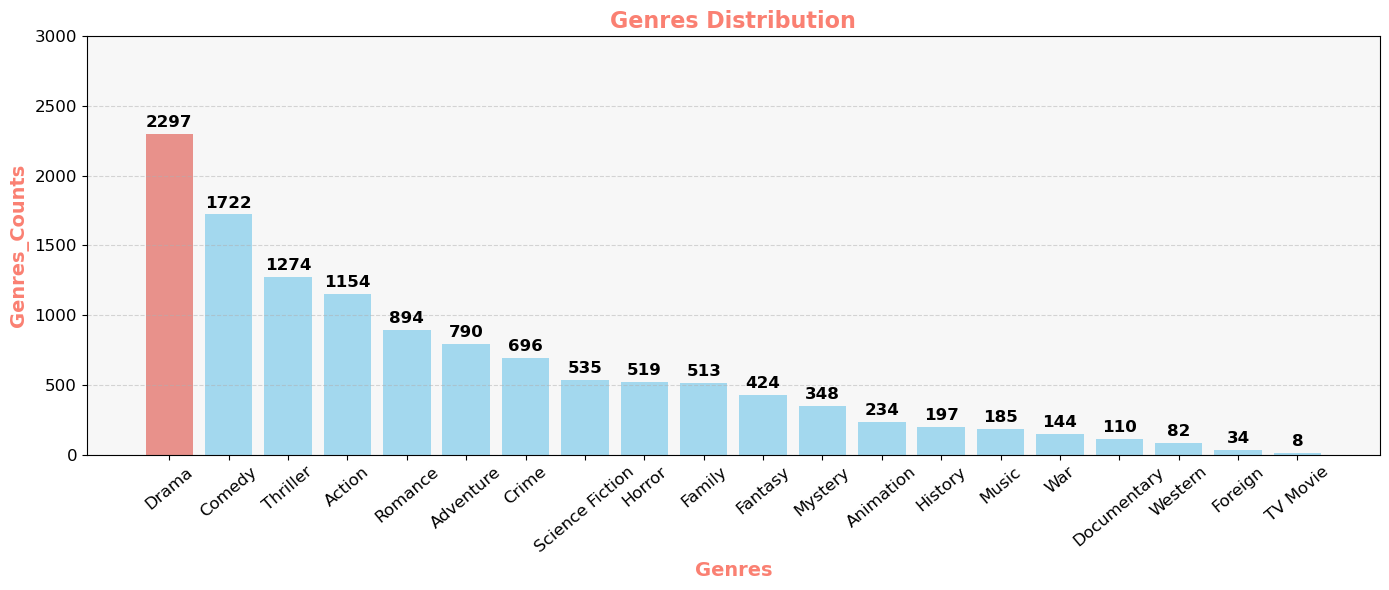

In [33]:
plt.figure(figsize=(14,6))

plt.bar(genre_counts.index,genre_counts.values, color="skyblue",alpha=0.75)
plt.xlabel("Genres",color = "salmon",fontsize=14,fontweight = "bold")
plt.ylabel("Genres_Counts",color = "salmon",fontsize=14,fontweight = "bold")
plt.title("Genres Distribution",color = "salmon",fontsize=16,fontweight = "bold")
plt.xticks(rotation=40,fontsize=12)

#highlight most common
plt.bar(most_common,genre_counts[most_common],color="salmon",alpha=0.8)

# customize yaxis label
plt.yticks(range(0,3001,500),fontsize=12)

# Data Labelling
for genre, count in zip(genre_counts.index,genre_counts.values):
    plt.text(genre,count + 50, str(count),ha="center",fontweight = "bold",fontsize=12)

# adding grid
plt.grid(axis="y",linestyle="--",alpha=0.5)

# Adding Background color
ax=plt.gca()
ax.set_facecolor("#f7f7f7")

#improving asthetic

plt.tight_layout()
plt.show()

### Release Date Time Series:
##### Create a time series plot to show how the number of movie releases has changed over time. You can group the data by year or month and plot the count of movies released.

In [34]:
release_date = movie_credit["release_date"]
release_date.head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [35]:
year = release_date.dt.year
year.head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4    2012.0
Name: release_date, dtype: float64

### Counting movies released in each year

In [36]:
year_count = year.value_counts().sort_index()
year_count

1916.0      1
1925.0      1
1927.0      1
1929.0      2
1930.0      1
         ... 
2013.0    231
2014.0    238
2015.0    216
2016.0    104
2017.0      1
Name: release_date, Length: 90, dtype: int64

In [37]:
max_count = year_count.idxmax()
max_count

2009.0

### Time Series Plot of Total Movies released each year

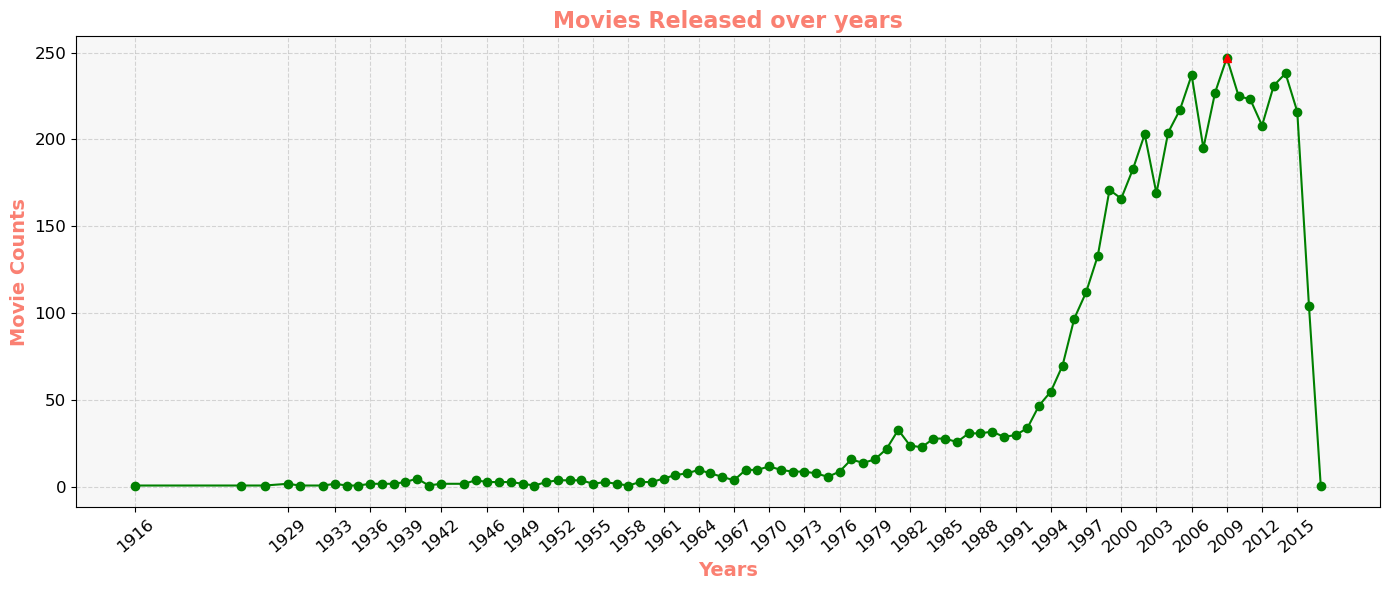

In [38]:
plt.figure(figsize=(14,6))

plt.plot(year_count.index,year_count.values,marker ='o', color = "green")
plt.xlabel("Years",color = 'salmon',fontsize = 14, fontweight= 'bold')
plt.ylabel("Movie Counts",color = 'salmon',fontsize = 14, fontweight= 'bold')
plt.title("Movies Released over years",color = 'salmon',fontsize = 16, fontweight= 'bold')

# set Appearance
plt.xticks(rotation=40,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True,linestyle='--',alpha=0.5)
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Highlighting
plt.plot(max_count,year_count[max_count],marker = '^',color = 'red')

# Setting X axis scale
plt.xticks(year_count.index[::3]) #show every 5 years

plt.tight_layout()
plt.show()

### Language Distribution Pie Chart:
    ### Visualize the distribution of original languages in your dataset using a pie chart. It can show which languages are most common

In [39]:
spoken_languages = movie_credit["spoken_languages"]
spoken_languages.head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

### Extracting Languages

In [40]:
def extract_language(lst):
    values = json.loads(lst)
    return [i["name"]for i in values]

In [41]:
extract_language(spoken_languages[0])

['English', 'Español']

In [42]:
languages = spoken_languages.apply(extract_language)
languages.head()

0                                 [English, Español]
1                                          [English]
2    [Français, English, Español, Italiano, Deutsch]
3                                          [English]
4                                          [English]
Name: spoken_languages, dtype: object

### Merging all languages list into a single list 

In [43]:
all_languages = []
for i in languages.values:
    all_languages.extend(i)

In [44]:
all_languages[:10]

['English',
 'Español',
 'English',
 'Français',
 'English',
 'Español',
 'Italiano',
 'Deutsch',
 'English',
 'English']

In [45]:
lang_count = pd.Series(all_languages).value_counts()
lang_count

English        4485
Français        437
Español         351
Deutsch         262
Italiano        188
               ... 
বাংলা             1
Català            1
??????            1
Bamanankan        1
Slovenščina       1
Length: 62, dtype: int64

In [46]:
lang_count = lang_count[lang_count>100]
lang_count

English     4485
Français     437
Español      351
Deutsch      262
Italiano     188
Pусский      185
普通话          107
dtype: int64

### pie chart

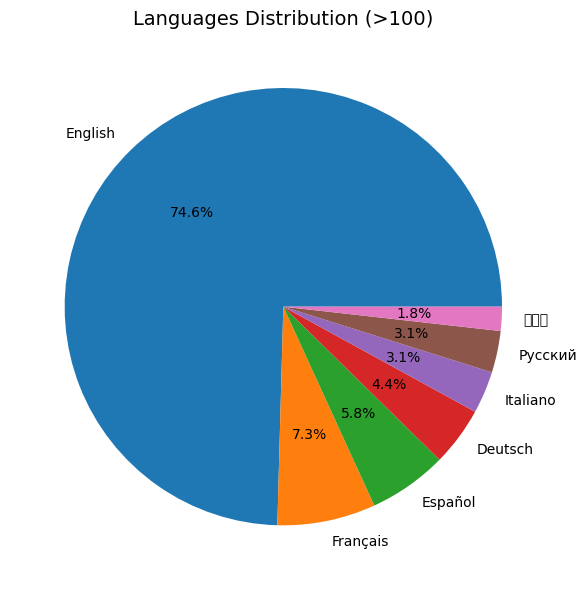

In [47]:
plt.figure(figsize=(14,6))

plt.pie(lang_count,autopct = "%.1f%%",labels=lang_count.index)
plt.title("Languages Distribution (>100)", fontsize = 14)

plt.tight_layout()
plt.show()

### Vote Average Distribution Histogram:
#### Create a histogram to show the distribution of vote averages for movies. This can help you understand the general sentiment or rating distribution of the movies

In [48]:
votes = movie_credit["vote_average"]
votes.values

array([7.2, 6.9, 6.3, ..., 7. , 5.7, 6.3])

### Ploting Histogram

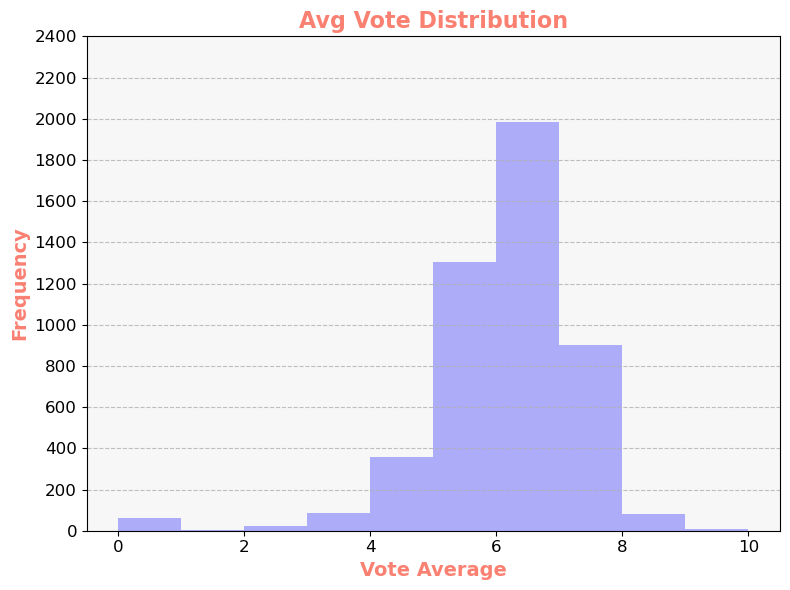

In [49]:
plt.figure(figsize=(8,6))

plt.hist(votes, bins = 10, color = "blue",alpha= 0.3)
plt.xlabel("Vote Average",fontsize=14,color = 'salmon',fontweight='bold')
plt.ylabel("Frequency",fontsize=14,color='salmon',fontweight='bold')
plt.title("Avg Vote Distribution",fontsize=16,color='salmon',fontweight='bold')

plt.grid(axis='y',linestyle='--',alpha=0.8)

plt.yticks(range(0,2600,200),fontsize=12)
plt.xticks(fontsize=12)

plt.gca().set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

### Tagline Word Cloud:
#### Generate a word cloud from movie taglines to visualize the most common words or phrases used in movie marketing.

In [50]:
tagline = movie_credit['tagline']
tagline.head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [51]:
#pip install wordcloud

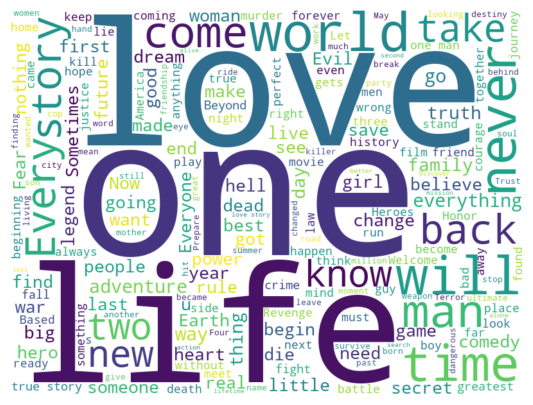

In [52]:
from wordcloud import WordCloud

tagline = tagline.dropna()

# merging all taglines into a single tag
tags = " ".join(tagline)

# Generate the word cloud
cloud = WordCloud(width=800,height=600,background_color='white').generate(tags)

# Displaying Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(cloud,interpolation='bilinear')

plt.axis('off')

plt.show()



### Correlation Heatmap:
##### Create a heatmap to visualize the correlations between numerical columns like budget, revenue, vote average, and vote count. This can help identify strong relationships between variables.

In [53]:
df = movie_credit[["budget","revenue","vote_average","vote_count"]]
df.head()

,budget,revenue,vote_average,vote_count
0,237000000,2787965087,7.2,11800
1,300000000,961000000,6.9,4500
2,245000000,880674609,6.3,4466
3,250000000,1084939099,7.6,9106
4,260000000,284139100,6.1,2124


In [54]:
co_relation = df.corr()

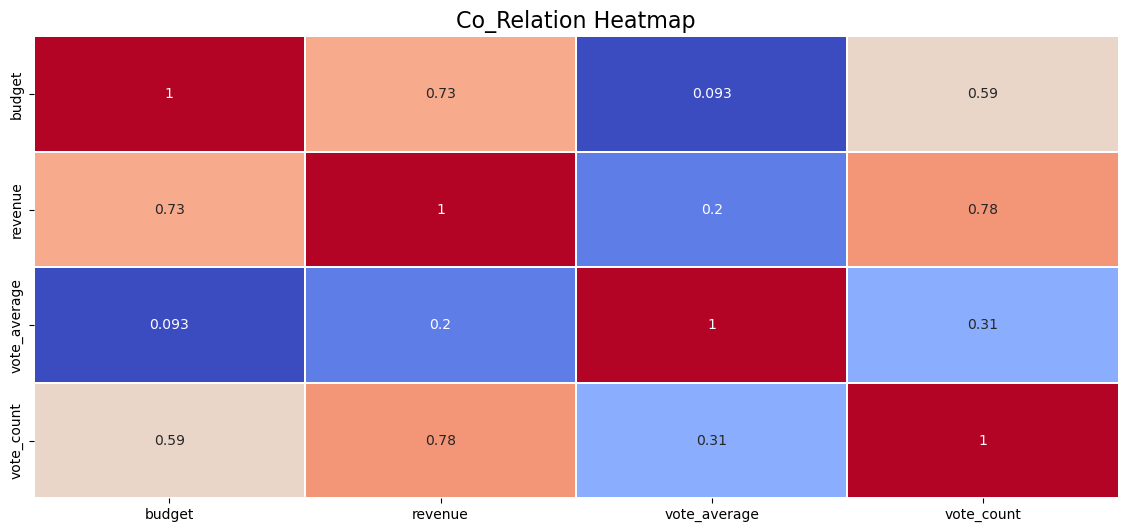

In [56]:
plt.figure(figsize=(14,6))

sns.heatmap(co_relation,annot=True, cmap='coolwarm',linewidths=0.3, cbar = False)
plt.title("Co_Relation Heatmap",fontsize=16)

plt.show()

### Overview Word Cloud:
#### Generate a word cloud from movie overviews to visualize the most commonwords or themes in movie descriptions

In [59]:
overview = movie_credit["overview"]
overview.head(3)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
Name: overview, dtype: object

### converting into list

In [60]:
overviews = overview.dropna().values.tolist()
overviews[:2]

['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.']

#### merging overview into a single word

In [61]:
all_overview = " ".join(overviews)

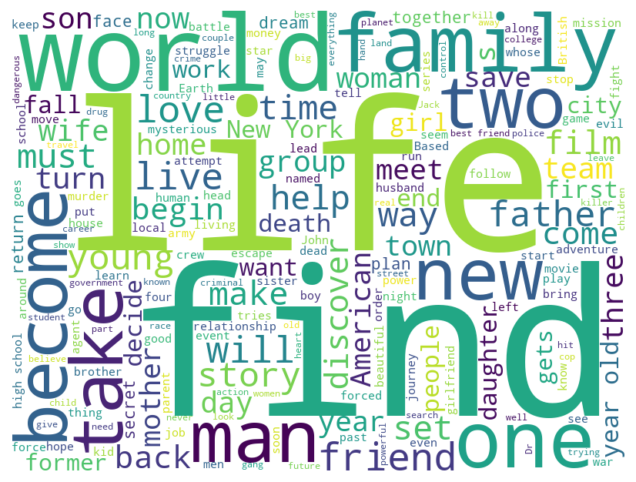

In [65]:
cloud = WordCloud(width = 800,height=600,background_color='white').generate(all_overview)

plt.figure(figsize=(14,6))
plt.imshow(cloud,interpolation = 'bilinear')
plt.axis('off')

plt.show()